# Определение потенциально успешного продукта для интернет-магазина "Стримчик"

**Описание исследования**

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Необходимо выявить определяющие успешность игры закономерности для планнирования будущих рекламных компаний.

**Цель исследования** - определить факторы, влияющие на успешность продукта и проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Описание данных**

Входные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

1. name — название игры
2. platform — платформа
3. year_of_release — год выпуска
4. genre — жанр игры
5. na_sales — продажи в Северной Америке (миллионы проданных копий)
6. eu_sales — продажи в Европе (миллионы проданных копий)
7. jp_sales — продажи в Японии (миллионы проданных копий)
9. other_sales — продажи в других странах (миллионы проданных копий)
10. critic_Score — оценка критиков (максимум 100)
11. user_Score — оценка пользователей (максимум 10)
12. rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования**
 
Перед тем, как непосредственно перейти к проверке гипотез необходимо провести их обзор, предобработку и анализ.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Исследовательский анализ факторов.
 5. Проверка гипотез

## Обзор данных

In [40]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Откроем датасет
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [42]:
# Получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [43]:
# Проверим на наличие дубликатов
data.duplicated().sum()

0

**Вывод:**
- Всего в табоице 11 столбцов и 16715 строчек. Дубликатов нет.
- Пропуски обнаружены в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. В первых трех столбцах пропусков очень мало, это можно объяснить технологической ошибкой или тем, что информация о годе, имени или жанре неизвестна. В остальных столбцах пропуски можно объяснить тем, что критики или пользователи или ESRB не выставляли игре оценки.
- В столбцах Year_of_Release и Critic_Score необходимо изменить типы данных на int. В столбцах NA_sales, EU_sales, JP_sales, Other_sales можно изменить тип данных на float32 для экономии памяти. В столбце User_Score необходимо изменить тип данных с object на float.
- В названиях всех столбцов необходимо изменить регистр.

## Предобработка данных

### Приведение названий к одному виду

In [44]:
# Приведем названия столбцов к одному виду с помощью метода str.lower
data.columns = data.columns.str.lower()

In [45]:
# Данные в столбцах name, platform и genre для удобства также приведем к одному регистру
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [46]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Работа с пропусками

In [47]:
# Подробнее изучим столбцы name и genre, так как в них одинаковое количество пропусков
data.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оба пропуска приходятся на одни и те же две игры. Вероятно они вызваны тем, что игра старая и данные о жанре и названии не сохранились. Так как это незначительная часть информации, мы можем их удалить.

In [48]:
# В столбце rating заменим пропуски на значение 'unknown'. Так как они могут также показать важные закономерности.
data['rating'] = data['rating'].fillna('unknown')

В столбце user_score в некоторых строчках указано значение "tbd", что означает to be determined и соотвествует NaN. Для этого случая подойдет метод to_numeric(), который заменит не числовые значения на NaN.

In [49]:
# Применим метод to_numeric()
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [50]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Корректно обработать и заменить пропуски в столбцах critic_score, user_score и year_of_release невозможно. Оставим их, как есть, так как их доля значительна.

### Изменение типов данных

In [51]:
# Подробнее изучим столбцы year_of_release и critic_score с целыми значениями
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [52]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В столбце year_of_release изменим тип данных на int. Поскольку в столбце есть NaN подойдет метод convert_dtypes(). В столбце critic_score не только целые значения, его трогать не будем.

In [53]:
# Изменим тип данных на int
data = data.reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].convert_dtypes()

In [54]:
# Проверим
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [55]:
# В столбцах na_sales, eu_sales, jp_sales, other_sales изменим тип данных на float32 для экономии памяти. Так как NaN нет, подойдет метод astype().
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].astype('float32')

In [56]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float32(4), float64(2), object(4)
memory usage: 1.2+ MB


### Подсчет сумарных продаж

In [57]:
# Посчитаем сумарные продажи и проверим
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [58]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,unknown,40.240002
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,unknown,31.380001
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.000000,0.000000,0.01,0.00,NaN,NaN,unknown,0.010000
16711,lma manager 2007,x360,2006,sports,0.000000,0.010000,0.00,0.00,NaN,NaN,unknown,0.010000
16712,haitaka no psychedelica,psv,2016,adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,unknown,0.010000
16713,spirits & spells,gba,2003,platform,0.010000,0.000000,0.00,0.00,NaN,NaN,unknown,0.010000


### Вывод

- Названия были приведены к одному виду.
- По возможности заменены пропуски, вызванные человеческим фактором.
- Были изменены типы данных на необходимые.
- Были подсчитаны суммарные продажи.

## Исследовательский анализ факторов

### Выявление актуального периода

In [59]:
# Посмотрим, сколько игр выпускалось в разные годы
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

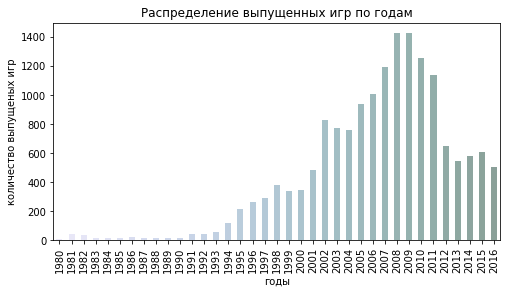

In [60]:
# Визуализируем
data.groupby('year_of_release')['name'].count().plot.bar(color=sns.cubehelix_palette(40, start=2), alpha=0.5, figsize=(8, 4)).set(ylabel='количество выпущеных игр', xlabel='годы', title='Распределение выпущенных игр по годам')
plt.show()

По графику видно, что выпуск игр динанимечен и в разные годы сильно отличается. Так что имеет смысл выбирать конкретный период, исходя из целей исследования.

In [61]:
# Выделим 10 самых прибыльных платформ
data_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
data_platforms

platform
ps2     1255.770020
x360     971.419983
ps3      939.649963
wii      907.510010
ds       806.119995
ps       730.859985
gba      317.850006
ps4      314.140015
psp      294.049988
pc       259.519989
Name: total_sales, dtype: float32

In [62]:
# Посмотрим как менялись по годам продажи у топ-10 платформ
list_p = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc']
data_platforms = data.query('platform in @list_p')
data_platforms = data_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_platforms

platform,ds,gba,pc,ps,ps2,ps3,ps4,psp,wii,x360
year_of_release,,,,,,,,,,
1985,0.020000,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.870000,6.030000,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.220000,35.959999,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.580000,94.700005,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.270000,136.169998,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.260000,169.490005,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.740000,144.529999,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# В таблице много NaN, это означает, что в определенный год на платформе не было продаж, заменим пропуски на 0.
data_platforms = data_platforms.fillna(0)

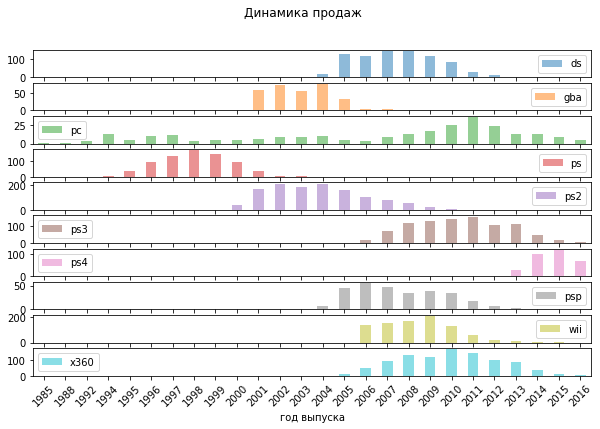

In [64]:
# Построим график
axes = data_platforms.plot.bar(figsize=(10,6), subplots=True, alpha=0.5, title ='Динамика продаж', xlabel='год выпуска', rot=45)
[ax.set_title(None) for ax in axes]
plt.show()

**Вывод:** 
- Судя по гистограмме распределения выпущенных игр по годам, больше всего игр выпускалось в период с 2005 по 2011 год.
- Судя по гистограмме распределения продаж, платформы в среднем живут около 10 лет, а пик продаж длится около 4 лет, за исключением pc, которая существует практически весь рассматриваемый период. Также, больше всего платформ было активно примерно с 2006 по 2014.
- Исходя из этих наблюдений, **актуальный период можно обозначить с 2013 по 2016 год**, важно учитывать, что за 2016 год данные могут быть неполными.

### Исследование платформ

In [65]:
# Отбросим данные до 2013 года
data = data.query('year_of_release >= 2013')

In [66]:
# Выявим 5 потенциально прибыльных платформы на актуальный период
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
ps4     314.140015
ps3     181.429993
xone    159.320007
3ds     143.250000
x360    136.800003
Name: total_sales, dtype: float32

In [67]:
# Проследим динамику продаж для этих 5 платформ
list_p = ['ps4', 'xone', '3ds', 'ps3', 'x360']

data_platforms = data.query('platform in @list_p')
data_platforms = data_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
data_platforms

platform,3ds,ps3,ps4,x360,xone
year_of_release,,,,,
2013,56.570000,113.250000,25.990000,88.580002,18.960001
2014,43.759998,47.759998,100.000000,34.740002,54.070000
2015,27.780001,16.820000,118.900002,11.960000,60.139999
2016,15.140000,3.600000,69.250000,1.520000,26.150000


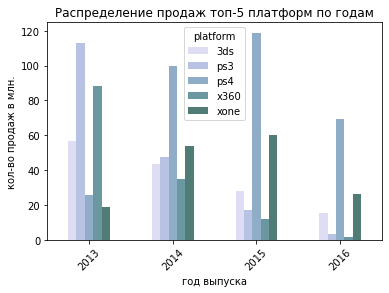

In [68]:
# Построим график
data_platforms.plot.bar(color=sns.cubehelix_palette(start=8), alpha=0.8, xlabel='год выпуска', ylabel='кол-во продаж в млн.', rot=45, title='Распределение продаж топ-5 платформ по годам')
plt.show()

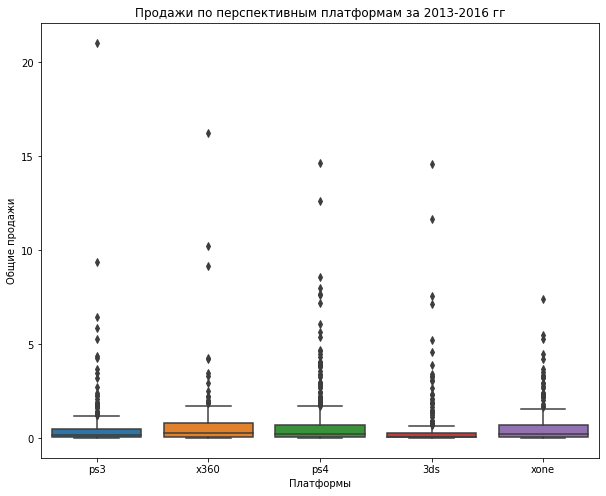

In [69]:
# Построим распределение
plt.figure(figsize=(10, 8))
(sns.boxplot(data = data.query('platform in @list_p'), y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

**Вывод:** 
- Судя по графику, продажи большинства платформ-лидеров падают, подъем ожидается для ps4 и xone. Необходимо также учитывать, что продажи в 2016 году ниже, так как данные за этот год неполные.
- Судя по коробчатой диаграмме, выше всего медианные продажи у ps4 и xone, ниже всего у x360. Для платформ xone и 3ds характерен более однородный разброс продаж, это значит, что их продажи стабильны, также у xone меньше всего выбросов. У ps4 есть выбивающиеся низкие продажи, а у ps3  и x360 напротив выбивающиеся высокие, соответственно игры для данных платформ продаются менее стабильно. Для ps3 характерны самые высокие выбросы. Также, судя по диаграмме, для всех платформ характерно ненормальное распределение со сдвигом вправо, т.е. к высоким значениям.
- Исходя из вышесказанного можно сделать вывод, что продажи игр для приставок восьмого поколения идут не спад, а продажи для приставок восьмого поколения растут.

### Влияние отзывов на продажи

In [70]:
# Выберем наибольшую доступную выборку для изучения влияния отзывов на продажи.
data.groupby('platform')['user_score'].count().sort_values(ascending=False).head()

platform
ps4     257
ps3     186
xone    182
pc      155
x360    143
Name: user_score, dtype: int64

In [71]:
data.groupby('platform')['critic_score'].count().sort_values(ascending=False).head()

platform
ps4     252
xone    169
pc      149
ps3     121
x360     81
Name: critic_score, dtype: int64

Проследим влияние *отзывов критиков* на продажи на примере платформы ps4. Получим коэффициент корреляции Пирсона и построим диаграмму рессеяния.

In [72]:
# Проследим влияние отзывов критиков на продажи на примере платформы ps4
data_platform = data.query('platform == "ps4"')
# Получим коэффициент корреляции Пирсона  
data_platform['critic_score'].corr(data_platform['total_sales'])

0.40656790102834933

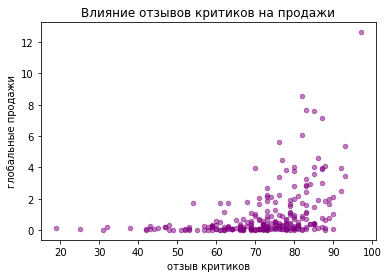

In [73]:
# Построим диаграмму рассеяния
data_platform.plot(x='critic_score', y='total_sales', kind='scatter', color='purple', alpha=0.5, title='Влияние отзывов критиков на продажи', xlabel='отзыв критиков', ylabel='глобальные продажи')
plt.show()

In [74]:
# Проследим влияние отзывов пользователей на продажи на примере платформы ps4. Получим коэффициент корреляции Пирсона
data_platform['user_score'].corr(data_platform['total_sales'])

-0.031957106803334974

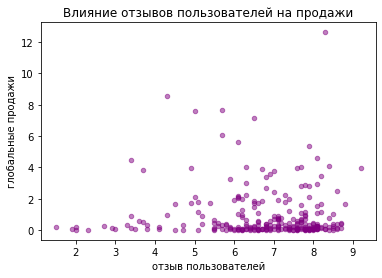

In [75]:
# Построим диаграмму рессеяния
data_platform.plot(x='user_score', y='total_sales', kind='scatter', color='purple', alpha=0.5, title='Влияние отзывов пользователей на продажи', xlabel='отзыв пользователей', ylabel='глобальные продажи')
plt.show()

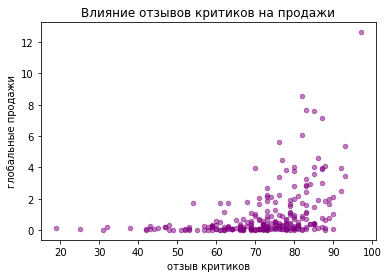

Коэффициент корреляции для ps4 = 0.40656790102834933


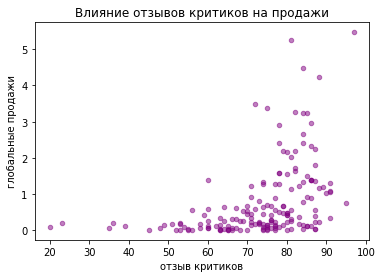

Коэффициент корреляции для xone = 0.41699832684400107


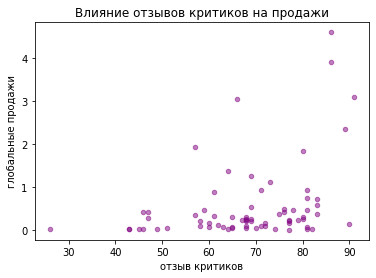

Коэффициент корреляции для 3ds = 0.3570566231203626


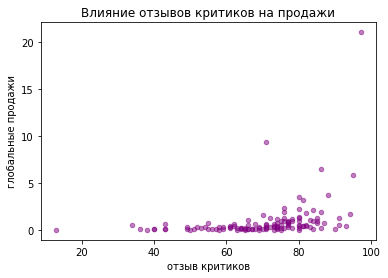

Коэффициент корреляции для ps3 = 0.33428534440727564


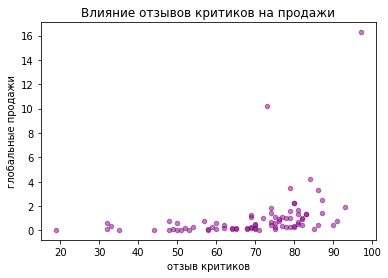

Коэффициент корреляции для x360 = 0.3503445453630288


In [76]:
# Построим графики корреляции отзывов критиков на продажи для остальных 5 платформ
for p in list_p:
    data_platforms = data.query('platform == @p')
    data_platforms.plot(x='critic_score', y='total_sales', kind='scatter', color='purple', alpha=0.5, title='Влияние отзывов критиков на продажи', xlabel='отзыв критиков', ylabel='глобальные продажи')
    plt.show()
    print(f'Коэффициент корреляции для {p} =', data_platforms['critic_score'].corr(data_platforms['total_sales']))

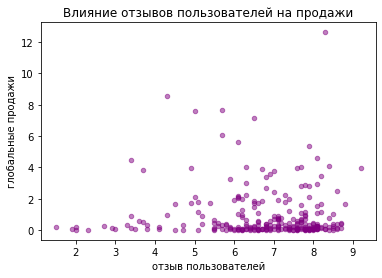

Коэффициент корреляции для ps4 = -0.031957106803334974


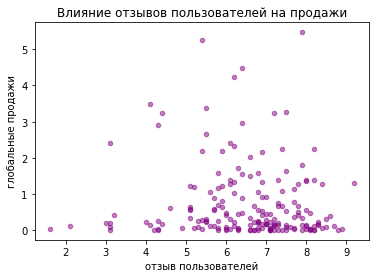

Коэффициент корреляции для xone = -0.06892505838290514


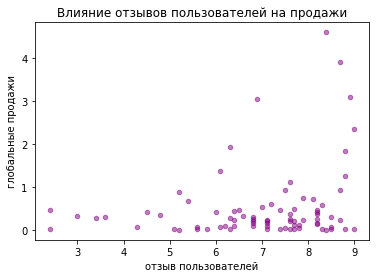

Коэффициент корреляции для 3ds = 0.24150412124356918


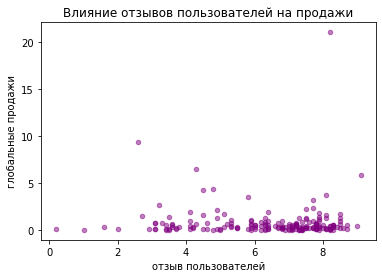

Коэффициент корреляции для ps3 = 0.0023944072401715305


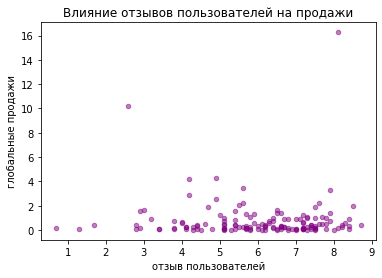

Коэффициент корреляции для x360 = -0.011742185794802308


In [77]:
# Построим графики корреляции отзывов пользователей на продажи для остальных 5 платформ
for p in list_p:
    data_platforms = data.query('platform == @p')
    data_platforms.plot(x='user_score', y='total_sales', kind='scatter', color='purple', alpha=0.5, title='Влияние отзывов пользователей на продажи', xlabel='отзыв пользователей', ylabel='глобальные продажи')
    plt.show()
    print(f'Коэффициент корреляции для {p} =', data_platforms['user_score'].corr(data_platforms['total_sales']))

**Вывод:** 
- Коэффициент корреляции отзывов критиков и продаж примерно равен 0.4, это значит, что между этими переменными умеренная положительная взаимосвязь. По графику, также видно, что тенденция усиливается на самых высоких оценках. Возможно, оценка критика влияет на уровень продаж и наоборот.
- Коэффициент корреляции отзывов пользователей и продаж примерно равен -0.03, это значит, что между этими переменными совершенно незначительная отрицательная взаимосвязь. По графику заметны выбросы. Однако вероятность, что отзыв пользователей влияет на уровень продаж крайне низка.
- Для остальных платформ, оценка критиков также имеет влияние на продажи, оценка пользователей - незначительный фактор увеличения продаж.

### Исследование жанров

In [78]:
# Изучим распределение игр по жанрам
data['genre'].value_counts()

action          766
role-playing    292
adventure       245
sports          214
shooter         187
misc            155
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: genre, dtype: int64

In [79]:
# Изучим распределение жанров по уровню продаж
data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
shooter         0.450
sports          0.240
platform        0.225
fighting        0.125
role-playing    0.125
racing          0.120
action          0.110
simulation      0.100
misc            0.100
strategy        0.080
puzzle          0.060
adventure       0.030
Name: total_sales, dtype: float32

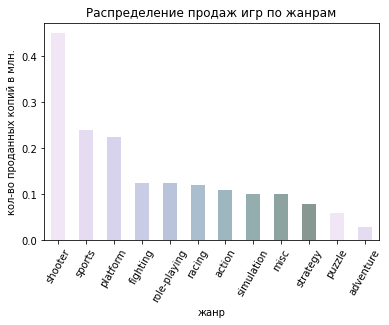

In [80]:
# Для наглядности построим график
data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot.bar(color=sns.cubehelix_palette(10, start=2, rot=0.5), alpha=0.5, rot=60, xlabel='жанр', ylabel='кол-во проданных копий в млн.', title='Распределение продаж игр по жанрам')
plt.show()

**Вывод:** 
- Судя по распределению количества выпущенных игр по жанрам, больше всего выпускают игр в жанре action (766 игр) и role-playing (292 игр), меньше всего puzzle (17 игр) и strategy (56 игр). Можно предположить, что спрос на игры в жанрах action и role-playing самый высокий, а на puzzle и strategy самый низкий.
- Судя по распределению количества продаж игр по жанрам, больше всего покупают игры в жанре shooter и action, это значит, что в действиетльности спрос на role-playing и action не такой высокий. Меньше всего покупают игры в жанре puzzle и adventure, это соответствует предположению выше.

## Исследовательский анализ рынков

### Изучение популярных платформ для разных регионов

In [81]:
# Наптшем функцию для выделения топ-5 платформ, остальные отнесем в "другое"
def platformer(platform):
    if platform in list_p:
        return platform
    else:
        return 'other'

In [82]:
# Построим таблицу с долей продаж для топ-5 платформ для разных регионов.
data_platforms = data.reset_index(drop=True)
data_platforms['platform'] = data_platforms['platform'].apply(platformer)
data_platforms = data_platforms.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
data_platforms = data_platforms/data[['eu_sales', 'na_sales', 'jp_sales']].sum()
data_platforms

,eu_sales,jp_sales,na_sales
platform,,,
3ds,0.078933,0.481674,0.087272
other,0.148535,0.233059,0.119920
ps3,0.172883,0.165862,0.145073
ps4,0.359712,0.113368,0.248429
x360,0.108406,0.003623,0.186562
xone,0.131530,0.002415,0.212744


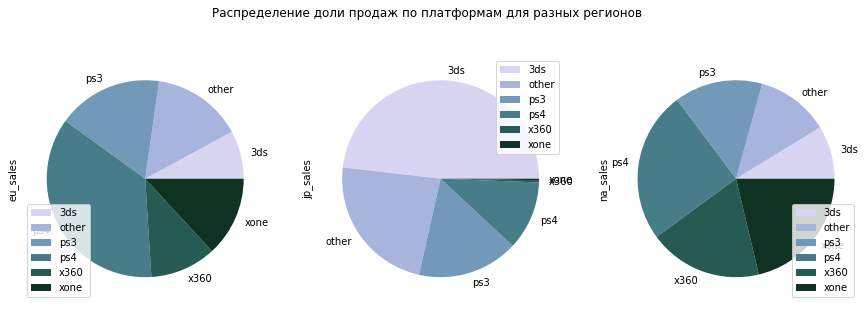

In [83]:
# Построим график распределения
axes = data_platforms.plot.pie(normalize=True, subplots=True, colors=sns.cubehelix_palette(start=2), title='Распределение доли продаж по платформам для разных регионов', figsize=(15,5))
plt.show()

**Вывод:**
- Пользователи из Европы больше всего отдают предпочтение японской платформе ps4 (разработчик Sony), являющейся приставкой восьмого поколения, меньше всего японской платформе 3ds разработчика nintendo.
- Пользователи из Японии напротив больше всего отдают предпочтение платформе 3ds. А меньше всего американской платформе xone. Также для них, в отличие от других регионов, характерно бОльшее доверие платформам, не входящим в топ-5.
- Пользователи из Северной Америки больше всего предпочитают ps4, на втором месте американская xone, а меньше всего 3ds, приставку восьмого поколения nintendo.
- Различие в долях продаж можно объяснить культурным и территориальным фактором. Японцы больше всего доверяют отечественному производителю, стоит также отметить, что больше они предпочитают японские региональные компании, нежели японские транснациональные и больше остальных предпочитают непопулярные платформы. Американцы и европейцы в свою очередь практически не поддерживают японские региональные компании, однако покупают много игр от японских и американских транснациональных компаний, также в этом отношении европейцы больше предпочитают первые, нежели вторые.

### Изучение популярных жанров для разных регионов

In [84]:
# Напишем функцию для выделения топ-5 платформ по жанрам, остальные отметим как "другое"
def genrer(genre):
    if genre in list_j:
        return genre
    else:
        return 'other'

In [85]:
# Построим таблицу с долей продаж для топ-5 жанров для разных регионов
list_j = ['shooter','sports','platform', 'fighting', 'role-playing']


data_genres = data.reset_index(drop=True)
data_genres['genre'] = data_genres['genre'].apply(genrer)
data_genres = data_genres.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
data_genres = data_genres/data[['eu_sales', 'na_sales', 'jp_sales']].sum()
data_genres

,eu_sales,jp_sales,na_sales
genre,,,
fighting,0.021798,0.054340,0.035526
other,0.465926,0.463702,0.417194
platform,0.039722,0.034025,0.041443
role-playing,0.094256,0.362552,0.106006
shooter,0.224001,0.046953,0.250714
sports,0.154297,0.038429,0.149117


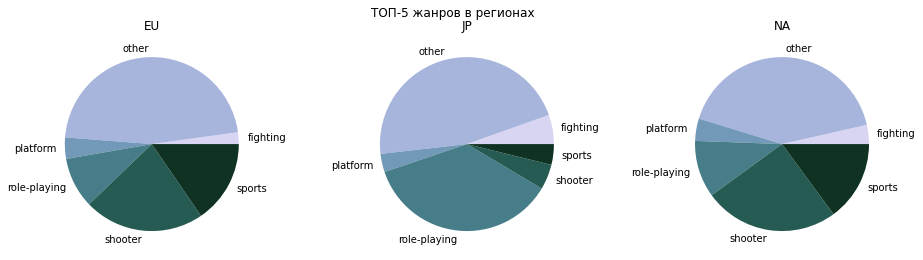

In [49]:
# Начертим круговую диаграмму для каждого региона
countries = data_genres.columns
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):

  axs[i].pie(data_genres[countries[i]], labels = data_genres.index, colors=sns.cubehelix_palette(start=8))
  # Зададим название региона.
  axs[i].set_title(data_genres.columns[i].split('_')[0].upper()) 
   
plt.show()

**Вывод:**
- Пользователи из всех регионов в основном выбирают игры жанров не из топ-5.
- В остальном, предпочтения европейцев и пользователей из Северной Америки схожи. Больше всего они покупают игры в жанре shooter и sports, а меньше всего в жанрах platform и fighting.
- Японцы больше всего покупают игры в жанре role-playing, а меньше всего в жанре sports и platform. Фавориты остальных регионах по уровню продаж в Японии также находятся в конце топа.
- Таким образом, можно сказать, что поведение японцев от поведения европейцев и американцев существенно отличается.

### Изучение влияния рейтинга ESRB на продажи в разных регионах

In [105]:
# Построим таблицу количеством продаж игр с разным возрастным ограничением
data_esrb = data.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
data_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,83.360001,15.140000,79.050003
E10+,42.689999,5.890000,54.240002
M,145.320007,14.110000,165.210007
T,41.950001,20.590000,49.790001
unknown,78.909996,85.050003,89.419998


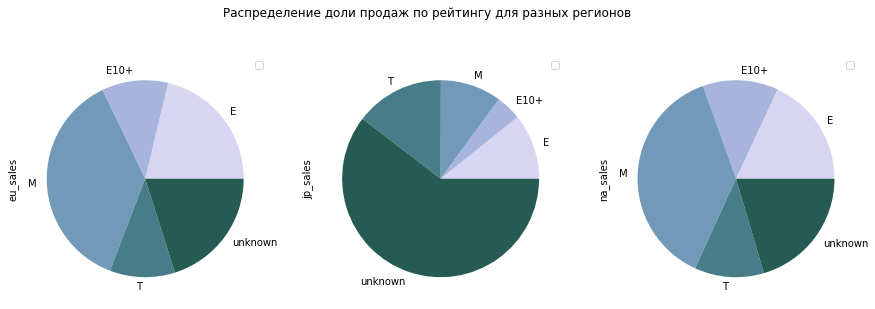

In [107]:
# Построим график
axes = data_esrb.plot(colors=sns.cubehelix_palette(start=8), kind='pie', subplots=True, title='Распределение доли продаж по рейтингу для разных регионов', figsize=(15,5))
[ax.legend('') for ax in axes]
plt.show()

**Вывод:**
- Европейцы и американцы в основном выбирают игры с возрастным ограниченим М - для взрослых. Менее всего они покупают игры с рейтингом Т - для подростков.
- Поведение японцев сильно отличается, в основном они выбирают игры без рейтинга, на втором месте по популярности - игры для подростков. Меньше всего они предпочитают игры с возрастным ограничением от 10 лет. 
- Стоит отметить, что ESRB - американская организация, я Японии и Европе действует своя рейтинговая система. Этим можно объяснить популярность игр без рейтинга ESRB в Японии. Тем не менее, доля игр без рейтинга у европейцев и американцев почти равна, из этого следует что игровой рынок, в отличие от Японии, в этих странах один и тот же.
- Вероятнее всего, в различных регионах основная аудитория разных возрастных категорий. В Европе и Америке - взрослые, в Японии - подростки. Так что, рейтинг может иметь значение при выборе потенциально популярного продукта, исходя из возраста основной аудитории.

## Проверка гипотез

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = средние пользовательские рейтинги платформ Xbox One и PC равны. 
- Н1 = средние пользовательские рейтинги платформ Xbox One и PC различается.

Чтобы проверить эту гипотезу нам надо сравнить средние двух выборок. Для проверки статистической значимости результатов используют метод scipy.stats.ttest_ind(). 

In [52]:
# Подготовим данные.
data_xbox = data.query('platform == "xone"').dropna()
data_xbox = data_xbox['user_score']

In [53]:
len(data_xbox)

165

In [54]:
data_pc = data.query('platform == "pc"').dropna()
data_pc = data_pc['user_score']

In [55]:
len(data_pc)

148

Несмотря на то, что выборки не одного размера, они достаточно большие, так что мы можем предположить, что их дисперсии примерно равны и оставить параметр equal_var=True. Пороговое значение alpha принято считать равным 0.05


In [56]:
# Проверим нулевую гипотезу
alpha = 0.05
results = st.ttest_ind(data_xbox, data_pc)
results.pvalue

0.17306926618147322

In [57]:
results.pvalue < alpha

False

P-value больше значения alpha: **не получилось отвергнуть нулевую гипотезу**

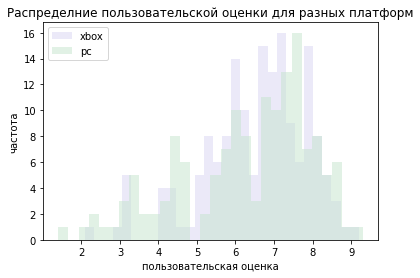

In [58]:
# Построим график обеих выборок
data_xbox.plot.hist(color=sns.cubehelix_palette(start=2), alpha=0.5, bins=30)
data_pc.plot.hist(color=sns.cubehelix_palette(start=1), alpha=0.5, bins=30).set(ylabel='частота', xlabel='пользовательская оценка', title='Распределние пользовательской оценки для разных платформ')
plt.legend(['xbox', 'pc'])
plt.show()

**Вывод:** 

Статистический тест показал, что мы **не можем отлонить** гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC ген. совокупности.

### Гипотеза: средние пользовательские рейтинги жанров Action и Sports  разные.

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = Средние пользовательские рейтинги жанров Action и Sports равны. 
- Н1 = Средние пользовательские рейтинги жанров Action и Sports разные.

Чтобы проверить эту гипотезу нам надо сравнить средние двух выборок. Для проверки статистической значимости результатов используют метод scipy.stats.ttest_ind().

In [59]:
# Подготовим данные.
data_action = data.query('genre == "action"').dropna()
data_action = data_action['user_score']

In [60]:
len(data_action)

309

In [61]:
data_sports = data.query('genre == "sports"').dropna()
data_sports = data_sports['user_score']

In [62]:
len(data_sports)

110

Несмотря на то, что выборки не одного размера, они достаточно большие, так что мы можем предположить, что их дисперсии примерно равны и оставить параметр equal_var=True. Пороговое значение alpha принято считать равным 0.05

In [63]:
# Проверим нулевую гипотезу
alpha = 0.05
results = st.ttest_ind(data_sports, data_action)
results.pvalue

1.684099430689953e-16

In [64]:
results.pvalue < alpha

True

P-value меньше значения alpha: **отвергаем нулевую гипотезу**.

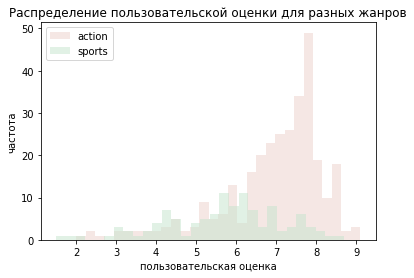

In [65]:
# Построим график обеих выборок
data_action.plot.hist(color=sns.cubehelix_palette(start=0), alpha=0.5, bins=30)
data_sports.plot.hist(color=sns.cubehelix_palette(start=1), alpha=0.5, bins=30).set(ylabel='частота', xlabel='пользовательская оценка', title='Распределение пользовательской оценки для разных жанров')
plt.legend(['action', 'sports'])
plt.show()

**Вывод:**

Тест показал, что стат. значимость нулевой гипотезы очень низка, и мы можем ее отклонить. Следовательно мы **не можем отклонить альтернативную гипотезу:** "Средние пользовательские рейтинги жанров Action и Sports разные".

## Общий вывод

Таким образом, исследование было выполнено в пять этапов:

1. **Обзор данных.** На этом этапе был распакован датасет, изучен на предмет пропусков и аномалий.
2. **Предобработка данных.** На данном этапе данные были приведены к одному типу, удалены или заменены пропуски, типы данных были изменены на нужные.
3. **Исследовательский анализ данных.** На этом этапе был выявлен актуальный период для дальнейшего исследования. Изучена динамика продаж для топ-5 платформ и жанров актуального периода, исследована взаимосвязь отзывов критиков и пользователей на продажи.
4. **Исследовательский анализ рынков**. На этом этапе было проанализированно поведение пользователей из разных регионов, в частности выбор платформы, жанров и степень влияния рейтинга ESRB на спрос.
5. **Проверка гипотез.** На этом этапе две гипотезы были проверены на статистическую значимость и сделаны выводы.

**Исследовательский анализ данных: выводы**
- **Выявление актуального периода:** больше всего игр выпускалось в период с 2005 по 2011 год, платформы в среднем живут около 10 лет, а пик продаж длится около 4 лет, за исключением ps, которая существует практически весь рассматриваемый период. Также, больше всего платформ было активно примерно с 2006 по 2014.Исходя из этих наблюдений, актуальный период можно обозначить с 2013 по 2016 год.
- **Исследование платформ:** продажи большинства платформ-лидеров падают, подъем ожидается для приставок 8 поколения. Выше всего медианные продажи у ps4 и xone, ниже всего у x360. Для платформ xone и 3ds характерен более стабильный уровень продаж. У ps4 есть экстремально низкие продажи, а у ps3 и x360 напротив экстремально высокие, соответственно игры для данных платформ продаются менее стабильно.
- **Влияние отзывов на продажи:** Коэффициент корреляции отзывов критиков и продаж примерно равен 0.4, это значит, что между этими переменными умеренная положительная взаимосвязь.Коэффициент корреляции отзывов пользователей и продаж примерно равен -0.03 и разнится в зависимости от платформы, это значит, что между этими переменными совершенно незначительная взаимосвязь. Можно сделать вывод, что оценка критиков возможно влияет на продажи игр, а вот оценка пользователей будет незначительными факторами увеличения продаж.
- **Исследование жанров:** Больше всего выпускают игр в жанре action (766 игр) и role-playing (292 игр), меньше всего puzzle (17 игр) и strategy (56 игр). Можно предположить, что спрос на игры в жанрах action и role-playing самый высокий, а на puzzle и strategy самый низкий. Больше всего покупают игры в жанре shooter и action, это значит, что в действиетльности спрос на role-playing и action не такой высокий. Меньше всего покупают игры в жанре puzzle и adventure, это соответствует предположению выше..

**Исследовательский анализ рынков: выводы**
- **Изучение популярных платформ для разных регионов:** для пользователей из разных регионов характерны разные предпочтения. Различие в долях продаж можно объяснить территориальным фактором. Японцы и американцы больше всего доверяют отечественным производителям, также японцы отдают меньшее предпочтение японским транснациональным компаниям, нежели японским региональным. Европейцы в свою очередь менее зависисмы от этого фактора и покупают игры для разных платформ. 
- **Изучение популярных жанров для разных регионов:** Предпочтения европейцев и пользователей из Северной Америки схожи. Больше всего они покупают игры в жанре shooter и sports, а меньше всего в жанрах platform и fighting. Японцы больше всего покупают игры в жанре role-playing, а меньше всего в жанре sports и platform. Фавориты остальных регионах по уровню продаж в Японии также находятся в конце топа. Можно сказать, что поведение японцев от поведения европейцев и американцев существенно отличается.
- **Изучение влияния рейтинга ESRB на продажи в разных регионах:** Поведение пользователей из Америки и Европы достаточно схоже - большинство выбирают игры с возрастным ограниченим М (для взрослых). Менее всего игры с рейтингом Т (для подростков). Повеление японцев сильно отличается, в основном они выбирают игры без рейтинга, так как в этом регионе рейтинговая система ESRB не популярна. на втором месте по популярности - игры для подростков. Меньше всего они предпочитают игры с возрастным ограничением от 10 лет. Вероятнее всего, в различных регионах основная аудитория разных возрастных категорий, так что, рейтинг может иметь значение при выборе потенциально популярного продукта, исходя из возраста основной аудитории. 

**Проверка гипотез: выводы**
1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **не отклонена.**
2. Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные - **не отклонена.**

**Вывод:** таким образом, факторами популярности игры может быть платформа, жанр и возрастной рейтинг, также важны особенности потациальной аудитории. Оценки пользователей и критиков на продажи влияют не сильно.